#EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('HR.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитаем основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
print(f"Work_accident mode: {df['Work_accident'].mode()[0]}")
print(f"salary mode: {df['salary'].mode()[0]}")
print(f"left mode: {df['left'].mode()[0]}")
print(f"department mode: {df['department'].mode()[0]}")
print(f"promotion_last_5years mode: {df['promotion_last_5years'].mode()[0]}")

Work_accident mode: 0
salary mode: low
left mode: 0
department mode: sales
promotion_last_5years mode: 0


Рассчитаем и визуализируем корреляционную матрицу для
количественных переменных

In [ ]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.6 MB/s eta 0:00:00


interval columns not set, guessing: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


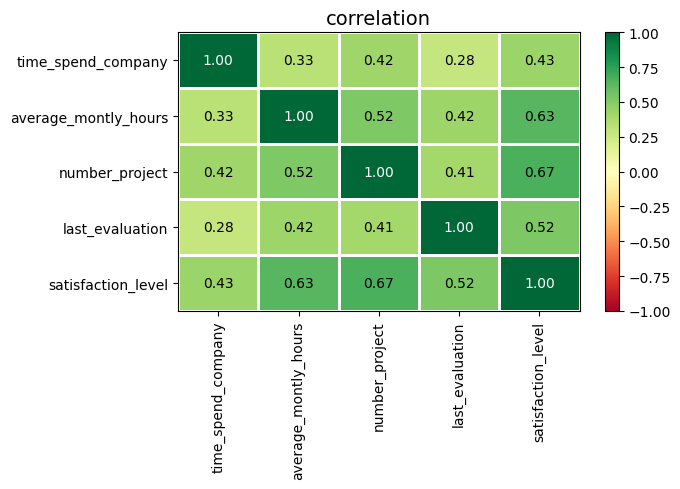

In [ ]:
phik_overview = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index)

**наиболее скоррелированны: satisfaction_level и number_project**

**наименее скоррелированны: time_spend_company и last_evaluation**


Рассчитаем колличество сотрудников каждом
департаменте

In [ ]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

Визуализируем распределение сотрудников по зарплатам

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

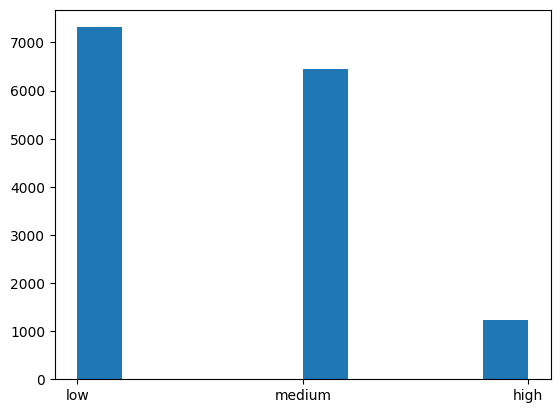

In [ ]:
plt.hist(df['salary'])

Визуализируем распределение сотрудников по зарплатам в каждом
департаменте по отдельности

array([[<Axes: title={'center': 'IT'}>,
        <Axes: title={'center': 'RandD'}>,
        <Axes: title={'center': 'accounting'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'management'}>,
        <Axes: title={'center': 'marketing'}>],
       [<Axes: title={'center': 'product_mng'}>,
        <Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'support'}>],
       [<Axes: title={'center': 'technical'}>, <Axes: >, <Axes: >]],
      dtype=object)

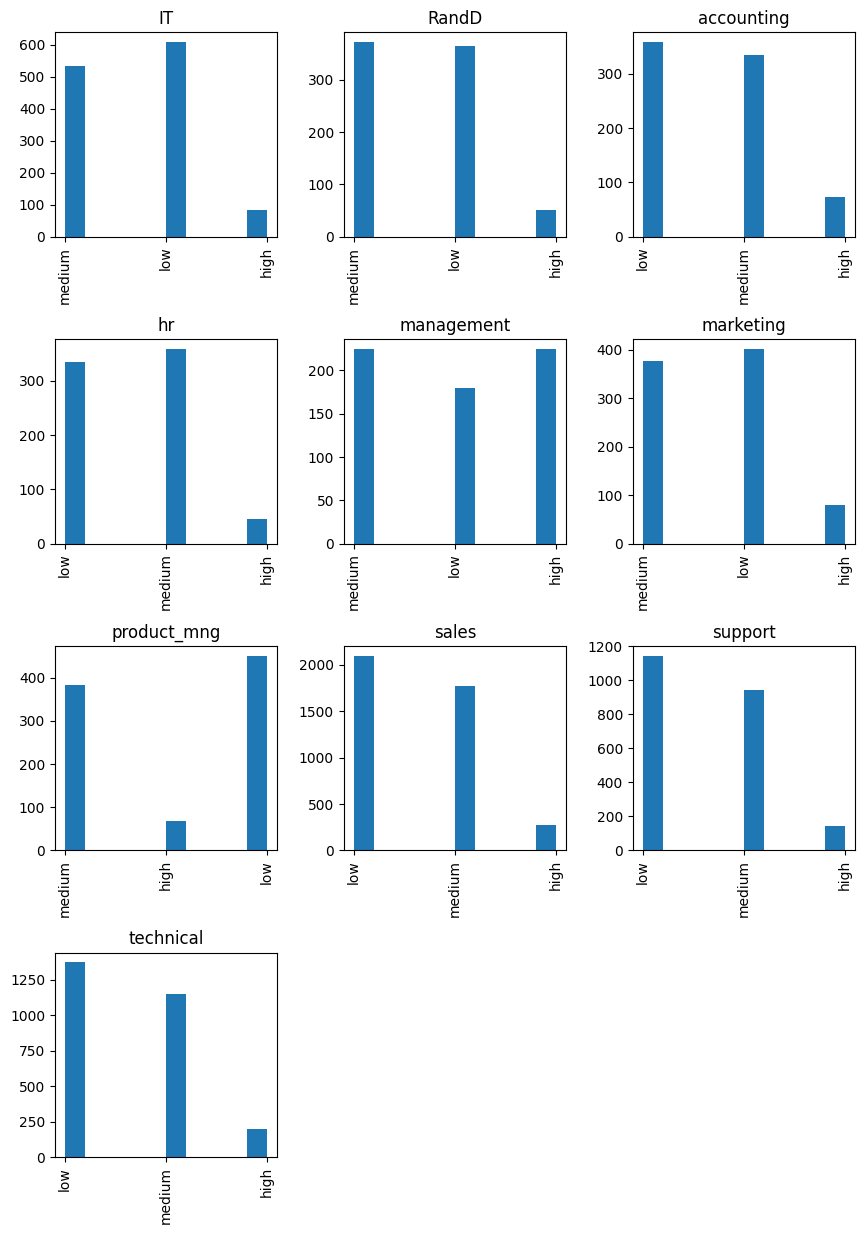

In [ ]:
df.hist('salary', by='department', figsize=(10, 15))

#Проверка гипотезы

Проверим гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
high = df[df['salary']=='high']['average_montly_hours']
low = df[df['salary']=='low']['average_montly_hours']

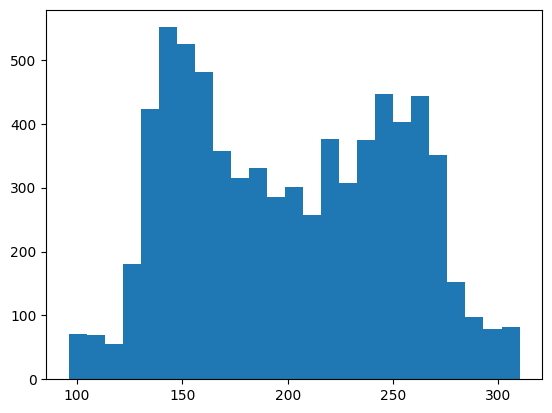

In [ ]:
plt.hist(low, bins=25);

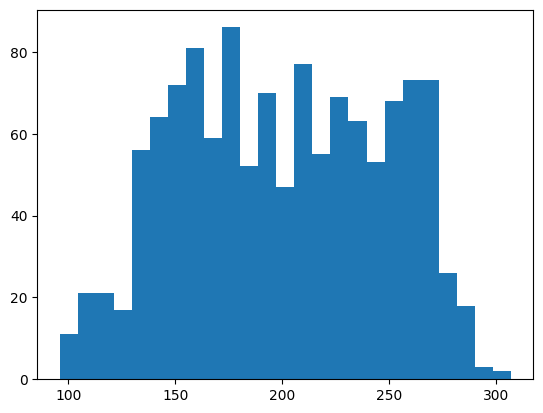

In [ ]:
plt.hist(high, bins=25);

**Данные распределены не нормально, для проверки используем тест Мана-Уитни. гиптеза 0: между группами с высокой и низкой зарплатой нет различия времени проведенного на работе.**

In [ ]:
stat, pval = stats.mannwhitneyu(high, low)

if pval > 0.05:
      print("принимаем гипотезу 0: между группами нет статистическо значимой разницы")
else:
      print("отвергаем гипотезу 0: между группами есть статистическо значимая разница")

принимаем гипотезу 0: между группами нет статистическо значимой разницы


<Axes: >

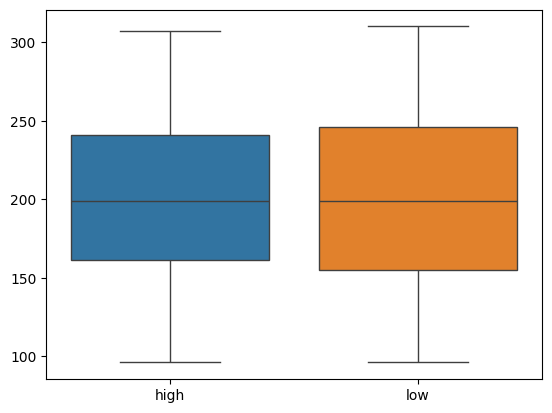

In [ ]:
data = pd.DataFrame({'high':high, 'low':low})
sns.boxplot(data=data)

**так же из распределения видно что среднее время на работе для обеих групп одинаково**

**8**

In [ ]:
left = df[df['left']==1]
unleft = df[df['left']==0]

In [ ]:
print(f"left satisfaction_level mean: {left['satisfaction_level'].mean()}")
print(f"left number_project mean: {left['number_project'].mean()}")
print(f"left promotion_last_5years: {100*len(left[left['promotion_last_5years']==1])/len(left)} %")

left satisfaction_level mean: 0.4400980117614114
left number_project mean: 3.8555026603192384
left promotion_last_5years: 0.5320638476617194 %


In [ ]:
print(f"unleft satisfaction_level mean: {unleft['satisfaction_level'].mean()}")
print(f"unleft number_project mean: {unleft['number_project'].mean()}")
print(f"unleft promotion_last_5years: {100*len(unleft[unleft['promotion_last_5years']==1])/len(unleft)} %")

unleft satisfaction_level mean: 0.666809590479524
unleft number_project mean: 3.786664333216661
unleft promotion_last_5years: 2.625131256562828 %


#Построение ML модели

Построим модель LDA, предсказывающую уволился ли
сотрудник

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [ ]:
data_control = df['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data_control, test_size=0.2, random_state=42)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7533333333333333